<a href="https://colab.research.google.com/github/boufik/Google-Colab-Projects/blob/main/Squid_Game_Dilemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Rules

There are 3 players playing in the semifinal and one must be eliminated, so that the other 2 can qualify to the final. They have to pick between random shapes (circle, triangle, rectangle), each one of them is tied with a condition.

* One shape guarantees a secure qualification in the final and the picking-player has to select their competitor in final
* The second shape instantly eliminates this player, so the remaining two qualify to the final
* The third one does nothing, so the picking-player must wait for next player's pick of another shape. Let's suppose here, that:

1. Circle (C) = Win + finalist's selection
2. Triangle (T) = instant Elimination
3. Rectange (R) = Wait for next pick

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

def pick_shape():
    return random.choice(["C", "T", "R"])

def pick_remaining_shapes():
    return random.choice(["C", "T"])

def select_random_finalist():
    return random.choice(["A", "B"])

# 2. Special Condition

Let's suppose that 2 of the 3 players cooperate. Before the beginning of the game, they have agreed that if one of them picks "C" (remember that the circle guarantees a spot in the final alongside a finalist of their choice), they will select each other and they are indeed willing to proceed this way.

Let's call these cooperating players "A" and "B". Also, let's call "M" the player that plays alone, without any allies!

In [33]:
# !!!! The function returns the percentages in M-A-B order for EVERY scenario

def run(SIMS, scenario):
    winsA = 0
    winsB = 0
    winsM = 0
    for SIM in range(SIMS):
        winners = scenario()
        if "A" in winners:
            winsA += 1
        if "B" in winners:
            winsB += 1
        if "M" in winners:
            winsM += 1
    percM = 100 * winsM / SIMS
    percA = 100 * winsA / SIMS
    percB = 100 * winsB / SIMS
    return percM, percA, percB

# !!!! The function returns the percentages in M-A-B order for EVERY scenario

# 3. Auxiliary Functions

In [3]:
def plot_scenario(x, y1, y2, labels, scenario_id, scenario_abb):

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # First subplot
    bars1 = ax1.bar(x, y1, color='skyblue')
    ax1.set_title(f"Scenario {scenario_id} - {scenario_abb} - Simulations")
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}%',
                ha='center', va='center', color='black', fontsize=10)

    # Second subplot
    bars2 = ax2.bar(x, y2, color='lightgreen')
    ax2.set_title(f"Scenario {scenario_id} - {scenario_abb} - Theoretical")
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels)
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}%',
                ha='center', va='center', color='black', fontsize=10)
    plt.show()

# 4. The six scenarios

There are 6 scenarios based on the order of players picking shapes. In any case, the game will have stopped by the second round (worst-case). If the first player picks either "C" or "T", two players instantly proceed in the final. The only way for the game to continue in the second round is only if the first-picking player selects randomly the "R", so the second player's random pick of shape will "determine" the finalists.

The order we enumerate the scenarios are based on an ascending picking order of player "M", meaning that the first two scenarios are those where player "M" plays first, while the two last ones are the ones where player "M" is the last-picking player.

1. S1 = MAB or Scenario 1 = M-A-B: The first player is "M", the second player is "A" (if the game has not ended by the first round) and the last one is player "B". Actually, the last players will not play in any of the six scenarios, since their fate will have already been determined by the choices of the first two players
2. S2 = MBA
3. S3 = AMB
4. S4 = ABM
5. S5 = BMA
6. S6 = BAM

## 4a. Scenario 1

In [4]:
# Scenario 1
# S1 = MAB

def scenario1(verbose=False):
    winners = list()
    pick1 = pick_shape()
    if pick1 == "C":
        # Player "M" qualifies and determines randomly the next finalist
        winners.append("M")
        winner2 = select_random_finalist()
        winners.append(winner2)
        if verbose:
            print(f"Player 1: M = C ---> Qualified!!!\nPlayer 2: A = ?\nPlayer 3: B = ?\n\nWinners = {winners}")
    elif pick1 == "T":
        # Player "M" is eliminated
        winners.append("A")
        winners.append("B")
        if verbose:
            print(f"Player 1: M = T ---> Eliminated...\nPlayer 2: A = ?\nPlayer 3: B = ?\n\nWinners = {winners}")
    else:
        # Player "M" has picked the rectange, so he is waiting for the pick of player "A"
        pick2 = pick_remaining_shapes()
        if pick2 == "C":
            # Player "A" qualifies and selects "B" as the next finalist
            winners.append("A")
            winners.append("B")
            if verbose:
                print(f"Player 1: M = R ---> Waiting...\nPlayer 2: A = C ---> Qualified!!!\nPlayer 3: B = ?\n\nWinners = {winners}")
        else:
            # Player "A" is eliminated, because he picked "T", so players "M" and "b" qualify
            winners.append("M")
            winners.append("B")
            if verbose:
                print(f"Player 1: M = R ---> Waiting...\nPlayer 2: A = T ---> Eliminated...\nPlayer 3: B = ?\n\nWinners = {winners}")
    return winners

scenario1(verbose=True)

Player 1: M = R ---> Waiting...
Player 2: A = T ---> Eliminated...
Player 3: B = ?

Winners = ['M', 'B']


['M', 'B']

Scenario 1 - MAB - Simulations
M : 49.77%
A : 66.80%
B : 83.43%

Scenario 1 - MAB - Thoeretical
M : 50.00%
A : 66.67%
B : 83.33%




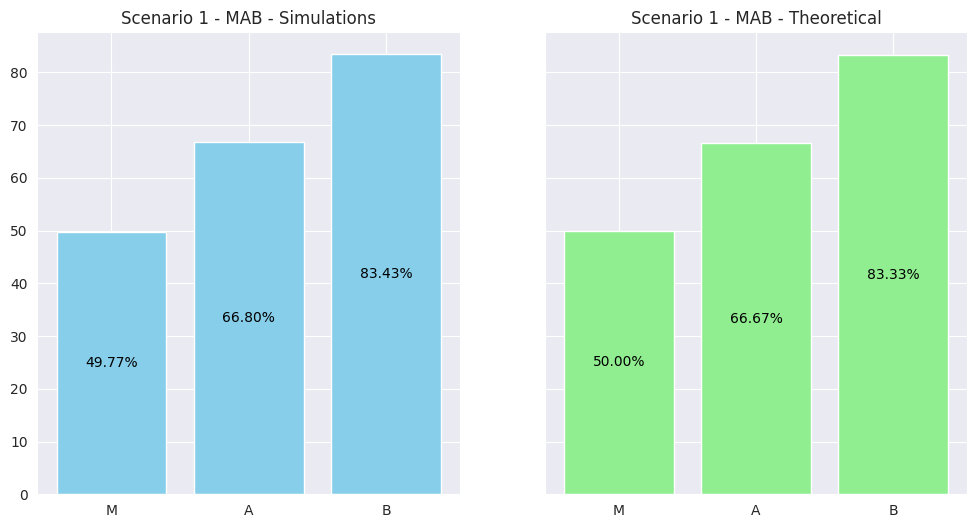

In [38]:
SIMS = 10**4
sc1_sim_percM, sc1_sim_percA, sc1_sim_percB = run(SIMS, scenario1)
prob1 = np.array([1/2, 2/3, 5/6])
sc1_thr_percM, sc1_thr_percA, sc1_thr_percB = list(100 * prob1)
print(f"Scenario 1 - MAB - Simulations\nM : {sc1_sim_percM:.2f}%\nA : {sc1_sim_percA:.2f}%\nB : {sc1_sim_percB:.2f}%\n")
print(f"Scenario 1 - MAB - Thoeretical\nM : {sc1_thr_percM:.2f}%\nA : {sc1_thr_percA:.2f}%\nB : {sc1_thr_percB:.2f}%")

y1 = [sc1_sim_percM, sc1_sim_percA, sc1_sim_percB]
y2 = [sc1_thr_percM, sc1_thr_percA, sc1_thr_percB]
x = list(range(len(y1)))
labels = ["M", "A", "B"]
scenario_id = 1
scenario_abb = "MAB"
print("\n")
plot_scenario(x, y1, y2, labels, scenario_id, scenario_abb)

## 4b. Scenario 2

In [6]:
# Scenario 2
# S2 = MBA

def scenario2(verbose=False):
    winners = list()
    pick1 = pick_shape()
    if pick1 == "C":
        # Player "M" qualifies and determines randomly the next finalist
        winners.append("M")
        winner2 = select_random_finalist()
        winners.append(winner2)
        if verbose:
            print(f"Player 1: M = C ---> Qualified!!!\nPlayer 2: B = ?\nPlayer 3: A = ?\n\nWinners = {winners}")
    elif pick1 == "T":
        # Player "M" is eliminated
        winners.append("B")
        winners.append("A")
        if verbose:
            print(f"Player 1: M = T ---> Eliminated...\nPlayer 2: B = ?\nPlayer 3: A = ?\n\nWinners = {winners}")
    else:
        # Player "M" has picked the rectange, so he is waiting for the pick of player "B"
        pick2 = pick_remaining_shapes()
        if pick2 == "C":
            # Player "B" qualifies and selects "A" as the next finalist
            winners.append("B")
            winners.append("A")
            if verbose:
                print(f"Player 1: M = R ---> Waiting...\nPlayer 2: B = C ---> Qualified!!!\nPlayer 3: A = ?\n\nWinners = {winners}")
        else:
            # Player "B" is eliminated, because he picked "T", so players "M" and "A" qualify
            winners.append("M")
            winners.append("A")
            if verbose:
                print(f"Player 1: M = R ---> Waiting...\nPlayer 2: B = T ---> Eliminated...\nPlayer 3: A = ?\n\nWinners = {winners}")
    return winners

scenario2(verbose=True)

Player 1: M = T ---> Eliminated...
Player 2: B = ?
Player 3: A = ?

Winners = ['B', 'A']


['B', 'A']

Scenario 2 - MBA - Simulations
M : 48.89%
B : 67.09%
A : 84.02%

Scenario 2 - MBA - Theoretical
M : 50.00%
B : 66.67%
A : 83.33%




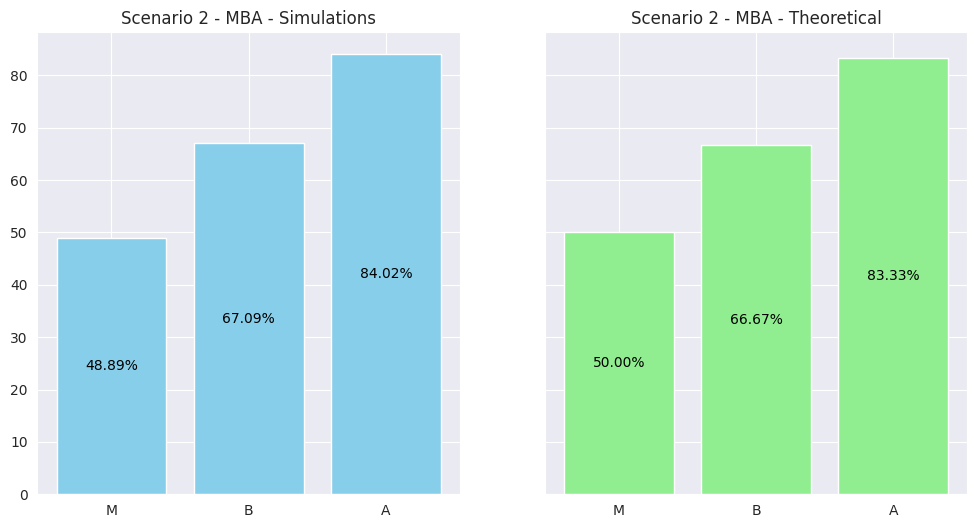

In [39]:
SIMS = 10**4
sc2_sim_percM, sc2_sim_percA, sc2_sim_percB = run(SIMS, scenario2)
prob2 = np.array([1/2, 2/3, 5/6])
sc2_thr_percM, sc2_thr_percB, sc2_thr_percA = list(100 * prob2)
print(f"Scenario 2 - MBA - Simulations\nM : {sc2_sim_percM:.2f}%\nB : {sc2_sim_percB:.2f}%\nA : {sc2_sim_percA:.2f}%\n")
print(f"Scenario 2 - MBA - Theoretical\nM : {sc2_thr_percM:.2f}%\nB : {sc2_thr_percB:.2f}%\nA : {sc2_thr_percA:.2f}%")

y1 = [sc2_sim_percM, sc2_sim_percB, sc2_sim_percA]
y2 = [sc2_thr_percM, sc2_thr_percB, sc2_thr_percA]
x = list(range(len(y1)))
labels = ["M", "B", "A"]
scenario_id = 2
scenario_abb = "MBA"
print("\n")
plot_scenario(x, y1, y2, labels, scenario_id, scenario_abb)

## 4c. Scenario 3

In [42]:
# Scenario 3
# S3 = AMB

def scenario3(verbose=False):
    winners = list()
    pick1 = pick_shape()
    if pick1 == "C":
        # Player "A" qualifies and selects "B" as the second finalist
        winners.append("A")
        winners.append("B")
        if verbose:
            print(f"Player 1: A = C ---> Qualified!!!\nPlayer 2: M = ?\nPlayer 3: B = ?\n\nWinners = {winners}")
    elif pick1 == "T":
        # Player "A" is eliminated
        winners.append("M")
        winners.append("B")
        if verbose:
            print(f"Player 1: A = T ---> Eliminated...\nPlayer 2: M = ?\nPlayer 3: B = ?\n\nWinners = {winners}")
    else:
        # Player "A" has picked the rectange, so he is waiting for the pick of player "M"
        pick2 = pick_remaining_shapes()
        if pick2 == "C":
            # Player "M" qualifies and selects randomly the next finalist
            winners.append("M")
            winner2 = select_random_finalist()
            winners.append(winner2)
            if verbose:
                print(f"Player 1: A = R ---> Waiting...\nPlayer 2: M = C ---> Qualified!!!\nPlayer 3: B = ?\n\nWinners = {winners}")
        else:
            # Player "M" is eliminated, because he picked "T", so players "A" and "B" qualify
            winners.append("A")
            winners.append("B")
            if verbose:
                print(f"Player 1: A = R ---> Waiting...\nPlayer 2: M = T ---> Eliminated...\nPlayer 3: B = ?\n\nWinners = {winners}")
    return winners

scenario3(verbose=True)

Player 1: A = R ---> Waiting...
Player 2: M = T ---> Eliminated...
Player 3: B = ?

Winners = ['A', 'B']


['A', 'B']

Scenario 3 - AMB - Simulations
A : 58.53%
M : 50.17%
B : 91.30%

Scenario 3 - AMB - Theoretical
A : 58.33%
M : 50.00%
B : 91.67%




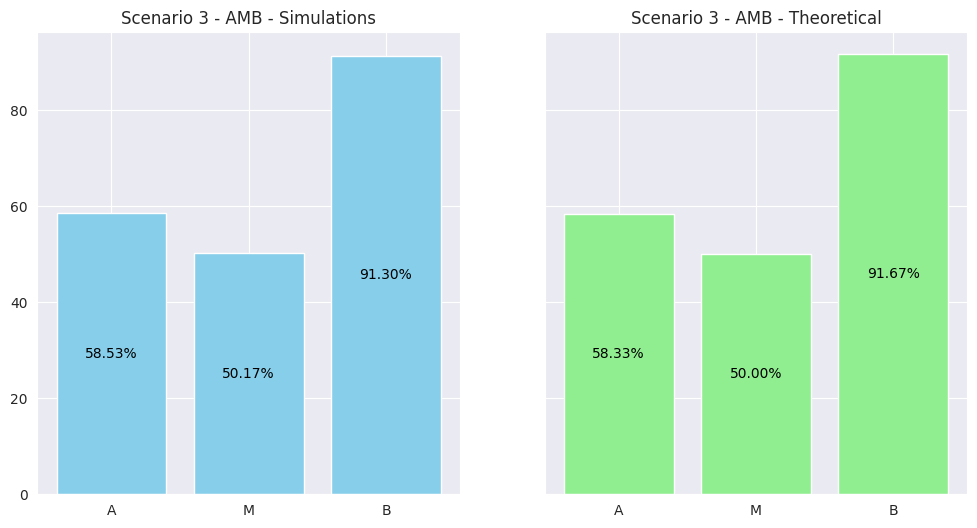

In [43]:
SIMS = 10**4
sc3_sim_percM, sc3_sim_percA, sc3_sim_percB = run(SIMS, scenario3)
prob3 = np.array([7/12, 1/2, 11/12])
sc3_thr_percA, sc3_thr_percM, sc3_thr_percB = list(100 * prob3)
print(f"Scenario 3 - AMB - Simulations\nA : {sc3_sim_percA:.2f}%\nM : {sc3_sim_percM:.2f}%\nB : {sc3_sim_percB:.2f}%\n")
print(f"Scenario 3 - AMB - Theoretical\nA : {sc3_thr_percA:.2f}%\nM : {sc3_thr_percM:.2f}%\nB : {sc3_thr_percB:.2f}%")

y1 = [sc3_sim_percA, sc3_sim_percM, sc3_sim_percB]
y2 = [sc3_thr_percA, sc3_thr_percM, sc3_thr_percB]
x = list(range(len(y1)))
labels = ["A", "M", "B"]
scenario_id = 3
scenario_abb = "AMB"
print("\n")
plot_scenario(x, y1, y2, labels, scenario_id, scenario_abb)

## 4d. Scenario 4

In [74]:
# Scenario 4
# S4 = ABM

def scenario4(verbose=False):
    winners = list()
    pick1 = pick_shape()
    if pick1 == "C":
        # Player "A" qualifies and selects "B" as the second finalist
        winners.append("A")
        winners.append("B")
        if verbose:
            print(f"Player 1: A = C ---> Qualified!!!\nPlayer 2: B = ?\nPlayer 3: M = ?\n\nWinners = {winners}")
    elif pick1 == "T":
        # Player "A" is eliminated
        winners.append("B")
        winners.append("M")
        if verbose:
            print(f"Player 1: A = T ---> Eliminated...\nPlayer 2: B = ?\nPlayer 3: M = ?\n\nWinners = {winners}")
    else:
        # Player "A" has picked the rectange, so he is waiting for the pick of player "B"
        pick2 = pick_remaining_shapes()
        if pick2 == "C":
            # Player "B" qualifies and selects "A" as the next finalist
            winners.append("A")
            winners.append("B")
            if verbose:
                print(f"Player 1: A = R ---> Waiting...\nPlayer 2: B = C ---> Qualified!!!\nPlayer 3: M = ?\n\nWinners = {winners}")
        else:
            # Player "B" is eliminated, because he picked "T", so players "A" and "M" qualify
            winners.append("A")
            winners.append("M")
            if verbose:
                print(f"Player 1: A = R ---> Waiting...\nPlayer 2: B = T ---> Eliminated...\nPlayer 3: M = ?\n\nWinners = {winners}")
    return winners

scenario4(verbose=True)

Player 1: A = R ---> Waiting...
Player 2: B = T ---> Eliminated...
Player 3: M = ?

Winners = ['A', 'M']


['A', 'M']

Scenario 4 - ABM - Simulations
A : 66.69%
B : 83.93%
M : 49.38%

Scenario 4 - ABM - Theoretical
A : 66.67%
B : 83.33%
M : 50.00%




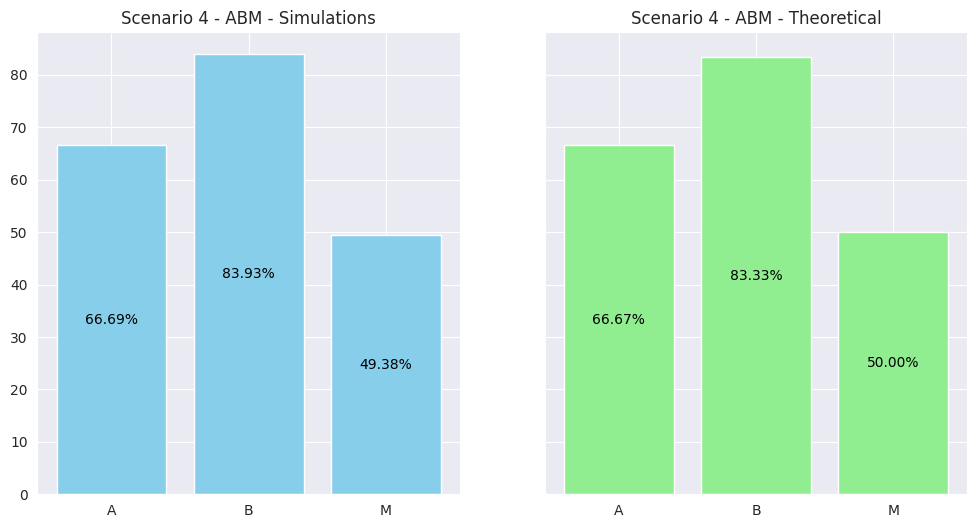

In [76]:
SIMS = 10**4
sc4_sim_percM, sc4_sim_percA, sc4_sim_percB = run(SIMS, scenario4)
prob4 = np.array([2/3, 5/6, 1/2])
sc4_thr_percA, sc4_thr_percB, sc4_thr_percM = list(100 * prob4)
print(f"Scenario 4 - ABM - Simulations\nA : {sc4_sim_percA:.2f}%\nB : {sc4_sim_percB:.2f}%\nM : {sc4_sim_percM:.2f}%\n")
print(f"Scenario 4 - ABM - Theoretical\nA : {sc4_thr_percA:.2f}%\nB : {sc4_thr_percB:.2f}%\nM : {sc4_thr_percM:.2f}%")

y1 = [sc4_sim_percA, sc4_sim_percB, sc4_sim_percM]
y2 = [sc4_thr_percA, sc4_thr_percB, sc4_thr_percM]
x = list(range(len(y1)))
labels = ["A", "B", "M"]
scenario_id = 4
scenario_abb = "ABM"
print("\n")
plot_scenario(x, y1, y2, labels, scenario_id, scenario_abb)

## 4e. Scenario 5

In [112]:
# Scenario 5
# S5 = BMA

def scenario5(verbose=False):
    winners = list()
    pick1 = pick_shape()
    if pick1 == "C":
        # Player "B" qualifies and selects "A" as the second finalist
        winners.append("B")
        winners.append("A")
        if verbose:
            print(f"Player 1: B = C ---> Qualified!!!\nPlayer 2: M = ?\nPlayer 3: A = ?\n\nWinners = {winners}")
    elif pick1 == "T":
        # Player "B" is eliminated
        winners.append("M")
        winners.append("A")
        if verbose:
            print(f"Player 1: B = T ---> Eliminated...\nPlayer 2: M = ?\nPlayer 3: A = ?\n\nWinners = {winners}")
    else:
        # Player "B" has picked the rectange, so he is waiting for the pick of player "A"
        pick2 = pick_remaining_shapes()
        if pick2 == "C":
            # Player "M" qualifies and selects randomly the next finalist
            winners.append("M")
            winner2 = select_random_finalist()
            winners.append(winner2)
            if verbose:
                print(f"Player 1: B = R ---> Waiting...\nPlayer 2: M = C ---> Qualified!!!\nPlayer 3: A = ?\n\nWinners = {winners}")
        else:
            # Player "M" is eliminated, because he picked "T", so players "B" and "A" qualify
            winners.append("B")
            winners.append("A")
            if verbose:
                print(f"Player 1: B = R ---> Waiting...\nPlayer 2: M = T ---> Eliminated...\nPlayer 3: A = ?\n\nWinners = {winners}")
    return winners

scenario5(verbose=True)

Player 1: B = R ---> Waiting...
Player 2: M = C ---> Qualified!!!
Player 3: A = ?

Winners = ['M', 'A']


['M', 'A']

Scenario 5 - BMA - Simulations
B : 58.77%
M : 49.60%
A : 91.63%

Scenario 5 - BMA - Theoretical
B : 58.33%
M : 50.00%
A : 91.67%




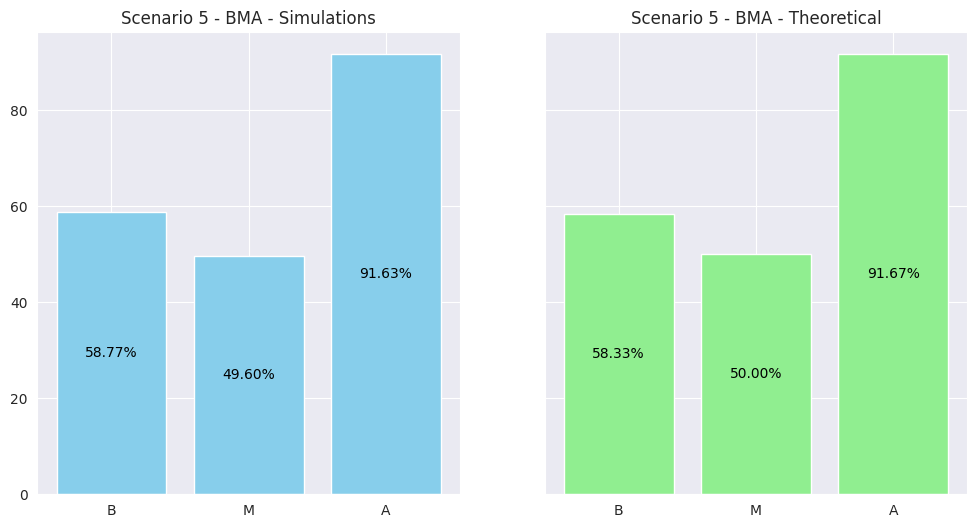

In [113]:
SIMS = 10**4
sc5_sim_percM, sc5_sim_percA, sc5_sim_percB = run(SIMS, scenario5)
prob5 = np.array([7/12, 1/2, 11/12])
sc5_thr_percB, sc5_thr_percM, sc5_thr_percA = list(100 * prob5)
print(f"Scenario 5 - BMA - Simulations\nB : {sc5_sim_percB:.2f}%\nM : {sc5_sim_percM:.2f}%\nA : {sc5_sim_percA:.2f}%\n")
print(f"Scenario 5 - BMA - Theoretical\nB : {sc5_thr_percB:.2f}%\nM : {sc5_thr_percM:.2f}%\nA : {sc5_thr_percA:.2f}%")

y1 = [sc5_sim_percB, sc5_sim_percM, sc5_sim_percA]
y2 = [sc5_thr_percB, sc5_thr_percM, sc5_thr_percA]
x = list(range(len(y1)))
labels = ["B", "M", "A"]
scenario_id = 5
scenario_abb = "BMA"
print("\n")
plot_scenario(x, y1, y2, labels, scenario_id, scenario_abb)

## 4f. Scenario 6

In [125]:
# Scenario 6
# S6 = BAM

def scenario6(verbose=False):
    winners = list()
    pick1 = pick_shape()
    if pick1 == "C":
        # Player "B" qualifies and selects "A" as the second finalist
        winners.append("B")
        winners.append("A")
        if verbose:
            print(f"Player 1: B = C ---> Qualified!!!\nPlayer 2: A = ?\nPlayer 3: M = ?\n\nWinners = {winners}")
    elif pick1 == "T":
        # Player "B" is eliminated
        winners.append("A")
        winners.append("M")
        if verbose:
            print(f"Player 1: B = T ---> Eliminated...\nPlayer 2: A = ?\nPlayer 3: M = ?\n\nWinners = {winners}")
    else:
        # Player "B" has picked the rectange, so he is waiting for the pick of player "A"
        pick2 = pick_remaining_shapes()
        if pick2 == "C":
            # Player "A" qualifies and selects "B" as the next finalist
            winners.append("B")
            winners.append("A")
            if verbose:
                print(f"Player 1: B = R ---> Waiting...\nPlayer 2: A = C ---> Qualified!!!\nPlayer 3: M = ?\n\nWinners = {winners}")
        else:
            # Player "A" is eliminated, because he picked "T", so players "B" and "M" qualify
            winners.append("B")
            winners.append("M")
            if verbose:
                print(f"Player 1: B = R ---> Waiting...\nPlayer 2: A = T ---> Eliminated...\nPlayer 3: M = ?\n\nWinners = {winners}")
    return winners

scenario6(verbose=True)

Player 1: B = R ---> Waiting...
Player 2: A = T ---> Eliminated...
Player 3: M = ?

Winners = ['B', 'M']


['B', 'M']

Scenario 6 - BAM - Simulations
B : 67.16%
A : 83.02%
M : 49.82%

Scenario 6 - BAM - Theoretical
B : 66.67%
A : 83.33%
M : 50.00%




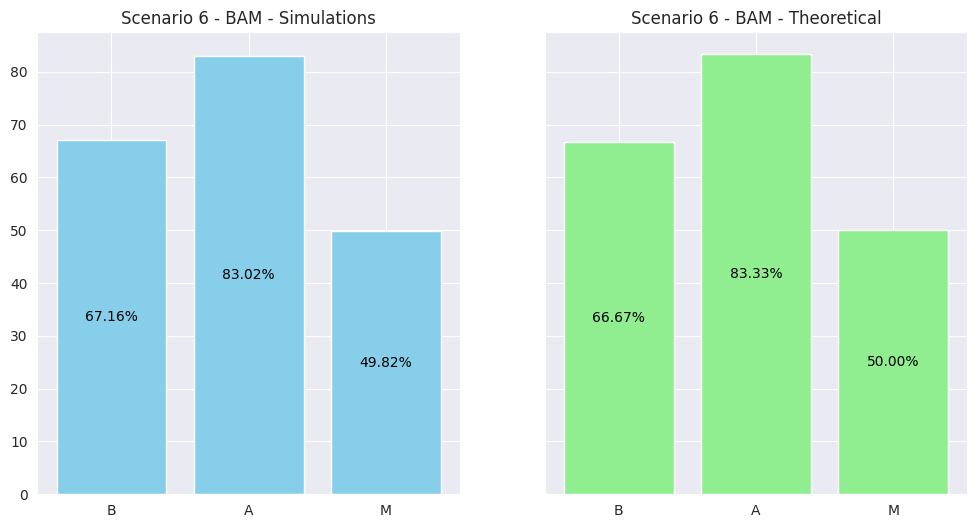

In [126]:
SIMS = 10**4
sc6_sim_percM, sc6_sim_percA, sc6_sim_percB = run(SIMS, scenario6)
prob6 = np.array([2/3, 5/6, 1/2])
sc6_thr_percB, sc6_thr_percA, sc6_thr_percM = list(100 * prob6)
print(f"Scenario 6 - BAM - Simulations\nB : {sc6_sim_percB:.2f}%\nA : {sc6_sim_percA:.2f}%\nM : {sc6_sim_percM:.2f}%\n")
print(f"Scenario 6 - BAM - Theoretical\nB : {sc6_thr_percB:.2f}%\nA : {sc6_thr_percA:.2f}%\nM : {sc6_thr_percM:.2f}%")

y1 = [sc6_sim_percB, sc6_sim_percA, sc6_sim_percM]
y2 = [sc6_thr_percB, sc6_thr_percA, sc6_thr_percM]
x = list(range(len(y1)))
labels = ["B", "A", "M"]
scenario_id = 6
scenario_abb = "BAM"
print("\n")
plot_scenario(x, y1, y2, labels, scenario_id, scenario_abb)

# 5. Summary

## 5a. DataFrame

In [158]:
# matrix = np.random.rand(6, 4)
index = ["S1 - MAB", "S2 - MBA", "S3 - AMB", "S4 - ABM", "S5 - BMA", "S6 - BAM"]
sc1 = [sc1_thr_percM, sc1_thr_percA, sc1_thr_percB]
sc2 = [sc2_thr_percM, sc2_thr_percA, sc2_thr_percB]
sc3 = [sc3_thr_percM, sc3_thr_percA, sc3_thr_percB]
sc4 = [sc4_thr_percM, sc4_thr_percA, sc4_thr_percB]
sc5 = [sc5_thr_percM, sc5_thr_percA, sc5_thr_percB]
sc6 = [sc6_thr_percM, sc6_thr_percA, sc6_thr_percB]
matrix = [sc1, sc2, sc3, sc4, sc5, sc6]
# Round the matrix float values with inline list manipulation
matrix = [[round(elem, 2) for elem in row] for row in matrix]

df = pd.DataFrame(data=matrix, columns=["M", "A", "B"], index=index)
print(df)

             M      A      B
S1 - MAB  50.0  66.67  83.33
S2 - MBA  50.0  83.33  66.67
S3 - AMB  50.0  58.33  91.67
S4 - ABM  50.0  66.67  83.33
S5 - BMA  50.0  91.67  58.33
S6 - BAM  50.0  83.33  66.67


## 5b. Heatmap

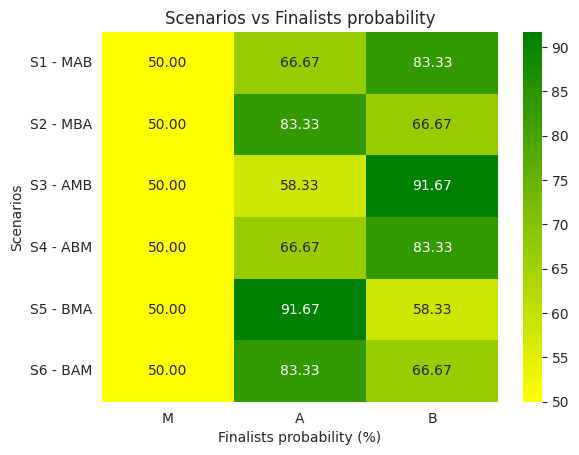

In [162]:
from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list("my_cmap", ["yellow", "green"])
sns.heatmap(df, cmap=my_cmap, annot=True, cbar=True, fmt=".2f")
plt.title("Scenarios vs Finalists probability")
plt.xlabel("Finalists probability (%)")
plt.ylabel("Scenarios")
plt.show()

According to the heatmap:
* Player "M" has the same probability (50.00%) of proceeding to the final regardless the scenario and the order of players.
* For player "A" the most fruitful strategy is scenario 5 (BMA) and generally speaking when playing as the last player. On the contrary, playing first in the game order, especially in scenario 3 (AMB), is the least convenient for "A".
* What is true for "A" is also true for player "B", but in the opposite way.

Summary: The lonely player has the same probability of proceeding to the final, while the allies A and B are benefitted when playing last, because when their ally plays before them, they can win if their ally chooses "C" (they qualify together) or "T" (their ally is eliminated/sacrificed, but they proceed themselves) or even "R" where they wait the second player's move.